In [9]:
class State:
    def __init__(self, transition):
        self.counter = 0
        self.set_transition(transition)
    
    def get_counter(self):
        return self.counter
    
    def visit(self):
        self.counter += 1
    
    def set_transition(self, transition):
        self.adj = transition
        self.cdf = [transition[0]]
        for i in range(1, len(transition)):
            self.cdf.append(self.cdf[-1] + transition[i])
        
    def get_next(self):
        import random
        u = random.random()
        for i in range(len(self.cdf)):
            if u < self.cdf[i]:
                return i + 1

In [10]:
import random

def run(N_iter):
    results = {}
    results[1] = []
    results[2] = []
    results[3] = []
    results[4] = []
    
    s2t = {1:1.5, 2:1, 3:0.250, 4: 0.05}
    
    thr = []
    
    states = {}
    states[1] = State([0.75, 0.25, 0, 0])
    states[2] = State([0.25, 0.50, 0.25, 0])
    states[3] = State([0, 0.40, 0.40, 0.20])
    states[4] = State([0, 0, 0.25, 0.75])
    
    state_id = random.randint(1, 4)
    for i in range(1, N_iter):
        states[state_id].visit()
        state_id = states[state_id].get_next()
        
        if i % 100 == 0:
            for j in range(1, 5):
                results[j].append(states[j].get_counter() / i)
            thr.append(s2t[state_id])
    
    print("Empirical stationary probability distribution")
    for i in range(1, 5):
        print("State {}: {}".format(i, states[i].get_counter() / N_iter))
    
    return results, thr

In [11]:
results, thr = run(1000000)

Empirical stationary probability distribution
State 1: 0.320612
State 2: 0.320176
State 3: 0.19926
State 4: 0.159951


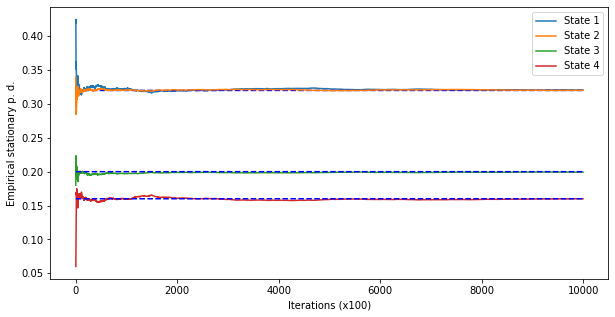

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
ax.plot(range(len(results[1])), results[1], label="State 1")
ax.plot(range(len(results[1])), [0.32 for _ in range(len(results[1]))], 'b--')
ax.plot(range(len(results[2])), results[2], label="State 2")
ax.plot(range(len(results[3])), results[3], label="State 3")
ax.plot(range(len(results[1])), [0.20 for _ in range(len(results[1]))], 'b--')
ax.plot(range(len(results[4])), results[4], label="State 4")
ax.plot(range(len(results[1])), [0.16 for _ in range(len(results[1]))], 'b--')
ax.legend()
plt.xlabel("Iterations (x100)")
plt.ylabel("Empirical stationary p. d.")
plt.show()

In [1]:
from math import sqrt

def compute_mean(values):
    tot = 0
    for i in values:
        tot += i
    return tot / len(values)

def compute_std_dev(values):
    mean = compute_mean(values)
    tot = 0
    for i in values:
        tot += (i - mean) ** 2
    return sqrt(tot / len(values))

def mean_interval(data, gamma):
    eta = None
    if gamma == 0.95:
        eta = 1.960
    elif gamma == 0.99:
        eta = 2.576
    else:
        # in these excercises we are only interested in 95% and 99% confidence
        pass
    mean = compute_mean(data)
    std_dev = compute_std_dev(data)
    incr = eta * std_dev / sqrt(len(data))
    return mean - incr, mean + incr

In [16]:
print("Average throughput: {}".format(compute_mean(thr)))
print("C.I. 95% [{}, {}]".format(mean_interval(thr, 0.95)[0], mean_interval(thr, 0.95)[1]))

Average throughput: 0.8711371137113839
C.I. 95% [0.8601111894002221, 0.8821630380225457]


In [17]:
a_thr = []
l_thr = []
h_thr = []

for i in range(len(thr)):
    values = thr[:i+1]
    a_thr.append(compute_mean(values))
    l, h = mean_interval(values, 0.95)
    l_thr.append(l)
    h_thr.append(h)

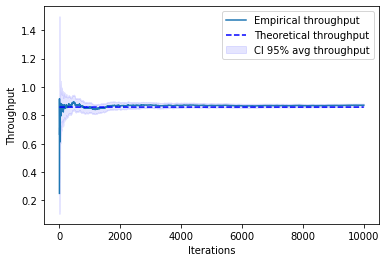

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range(len(a_thr)), a_thr, label="Empirical throughput")
ax.fill_between(range(len(a_thr)), l_thr, h_thr, color='b', alpha=.1, label="CI 95% avg throughput")
ax.plot(range(len(a_thr)), [0.32 * 1.5 + 0.32 * 1 + 0.20 * 0.250 + 0.16 * 0.050 for _ in range(len(a_thr))], 'b--', label="Theoretical throughput")
ax.legend()
plt.xlabel("Iterations")
plt.ylabel("Throughput")
plt.show()